In [9]:
!pip install proplot
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches, matplotlib.lines as mlines

from scipy import signal
import pickle
import pandas as pd
from itertools import product as prod
import proplot as pplt
import seaborn as sns


In [11]:
arr = np.load('arr.npy')

In [12]:
arr

array([[0.98823208, 0.99824623, 0.93826891, 0.98847614, 1.        ],
       [0.98870765, 0.99827509, 0.93868099, 0.98289859, 0.98704266],
       [0.98827925, 0.99798114, 0.93435974, 0.96944795, 0.96585234],
       [0.98736399, 0.99457571, 0.92817666, 0.95045094, 0.93994203],
       [0.98589629, 0.98111419, 0.91814593, 0.92402959, 0.90802574],
       [0.98502305, 0.95688576, 0.90336877, 0.8927541 , 0.87315881],
       [0.98456926, 0.93032905, 0.88733334, 0.86545031, 0.84469363],
       [0.9823582 , 0.9019537 , 0.86778168, 0.83655436, 0.81463834],
       [0.97711733, 0.87569359, 0.84904284, 0.81156801, 0.78931622],
       [0.96519479, 0.84347407, 0.82198177, 0.77774098, 0.75461196],
       [0.95115253, 0.82072984, 0.80249089, 0.75638395, 0.7333418 ]])

In [15]:
names = ['r9_w2vec', 'r3_w2vec', 'r9_nbrs', 'r3_nbrs', 'r3_local']

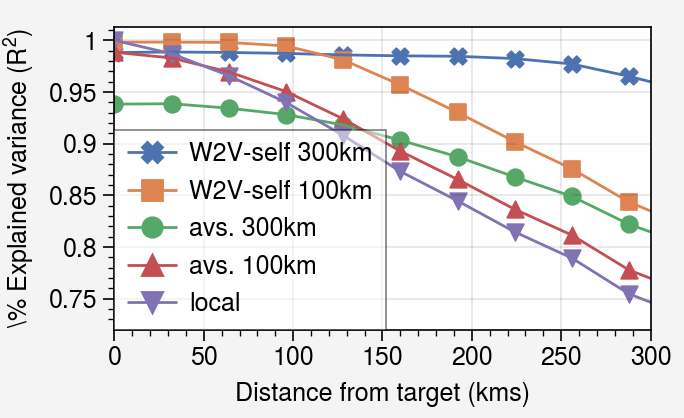

In [21]:
fig, ax = pplt.subplots([1], figsize=(3.42, 2.09))
kms = np.arange(arr.shape[0]) * 32
markers = ["X", "s", "o", "^", "v"]
colors = sns.color_palette("deep", n_colors=5)
for i, n in enumerate(names[:5]):
    ax.plot(kms, arr[:, i], lw=1, c=colors[i])
    ax.scatter(kms, arr[:, i], marker=markers[i], color=colors[i])
# ax.legend(loc="ll", ncol=1)
ax.set_xlabel("Distance from target (kms)")
ax.set_ylabel("\\% Explained variance ($R^2$)")

pretty_names = [
    "W2V-self 300km", "W2V-self 100km",
    "avs. 300km", "avs. 100km", "local"
]
plt.xlim(0, 300)

patches = [
    mlines.Line2D([], [], color=colors[i], label=pretty_names[i], marker=markers[i], markersize=7, linewidth=1)
    for i in range(5)
]
ax.legend(handles=patches, loc="ll", ncol=1, framealpha=0.5, fontsize=8)
#plt.savefig("../figures/explained_variance.png", bbox_inches="tight")